# 🔥Algerian Forest Fires Dataset Linear Regression

## Data Source

* Data was taken from UCI Machine Learning Repository , link to same is given below.
* link: https://archive-beta.ics.uci.edu/ml/datasets/algerian+forest+fires+dataset

## Problem statement

**To perdict the temperature using Linear regression and evaluating the models based on prefomance metrics.**

### Essential initializations

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

#### Loading the data

Loaded the dataset which was cleaned for pandas dataframe.

In [2]:
df = pd.read_csv(r"Algerian_forest_fires_dataset_PD_Dataframe.csv",index_col=0)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


### Understanding data

* The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia and the Sidi Bel-abbes.
* 122 instances for each region.
* 2 dimensional dataframe

### Attribute Information:

* Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

**Weather data observations**</br>
* Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42</br>
* RH : Relative Humidity in %: 21 to 90</br>
* Ws :Wind speed in km/h: 6 to 29</br>
* Rain: total day in mm: 0 to 16.8</br>

**FWI Components**</br>
* Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5</br>
* Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9</br>
* Drought Code (DC) index from the FWI system: 7 to 220.4</br>
* Initial Spread Index (ISI) index from the FWI system: 0 to 18.5</br>
* Buildup Index (BUI) index from the FWI system: 1.1 to 68</br>
* Fire Weather Index (FWI) Index: 0 to 31.1</br>
* Classes: two classes, namely fire and not fire</br>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int64  
 14  Region       244 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 30.5 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288484,47.619393,6.9,13.275,33.10,68.150,220.4


## Statistics (graph based)

### Univariate Analysis

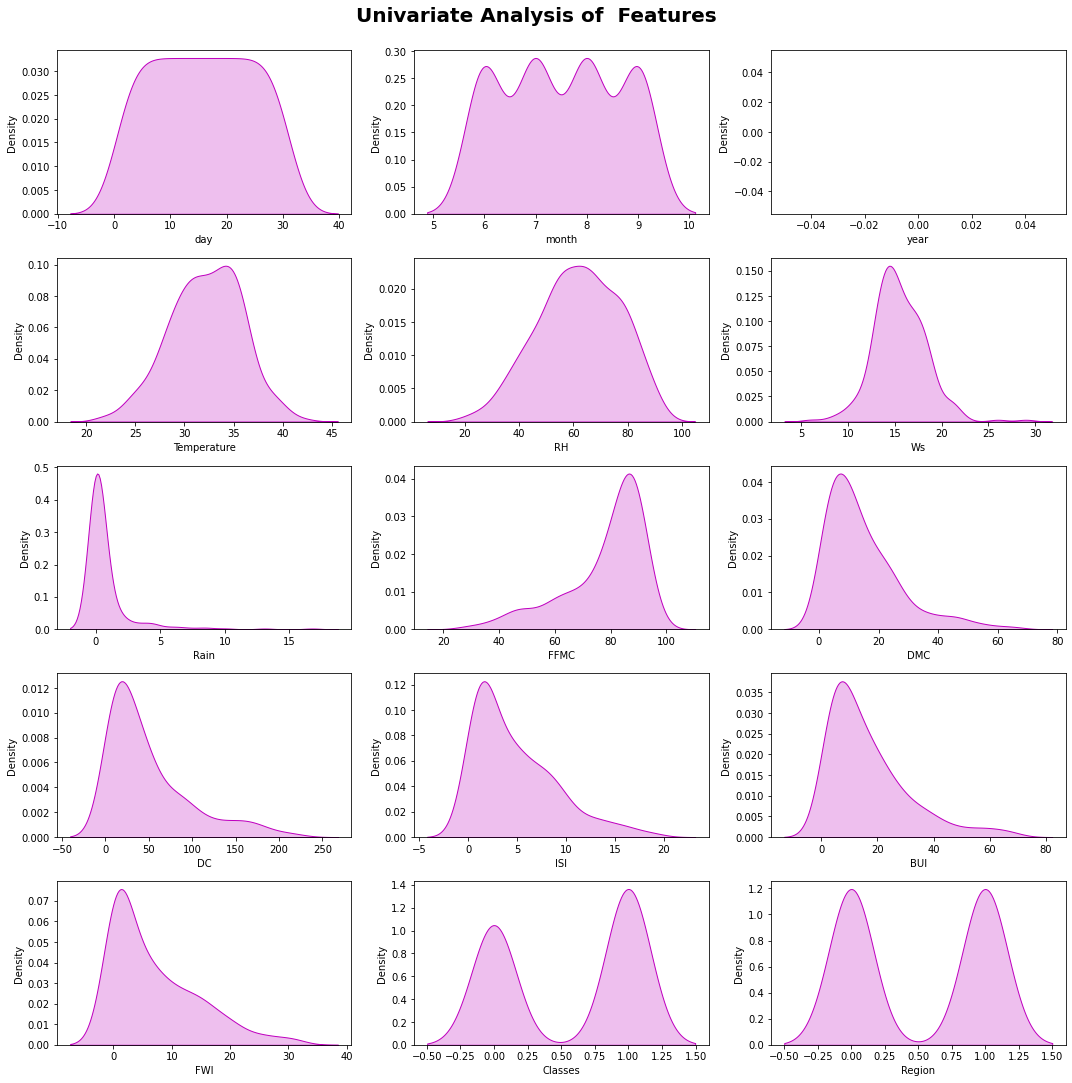

In [5]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of  Features', fontsize=20, fontweight='bold', y =1)

for i,j in enumerate(df.columns):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[j], shade=True, color='m')
    plt.xlabel(j)
    plt.tight_layout()

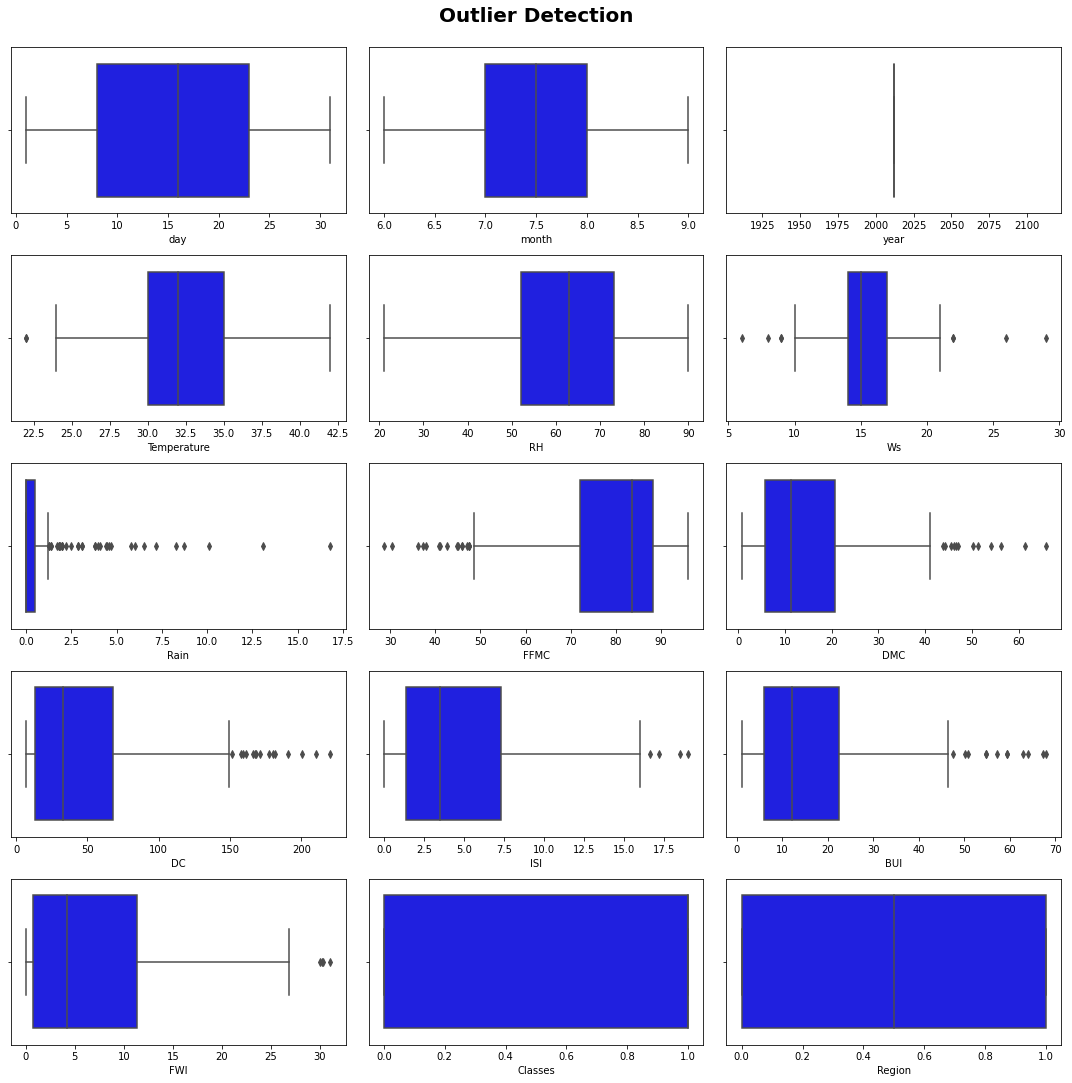

In [6]:
plt.figure(figsize=(15,15))
plt.suptitle('Outlier Detection', fontsize=20, fontweight='bold', y =1)

for i,j in enumerate(df.columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[j], color='b')
    plt.xlabel(j)
    plt.tight_layout()

### Multivariate Analysis

**Getting the correlation**

In [7]:
#  Not taking date features into consideration.

correlation = round(df[[col for col in df.columns if col not in ['day', 'month', 'year']]].corr(),2)

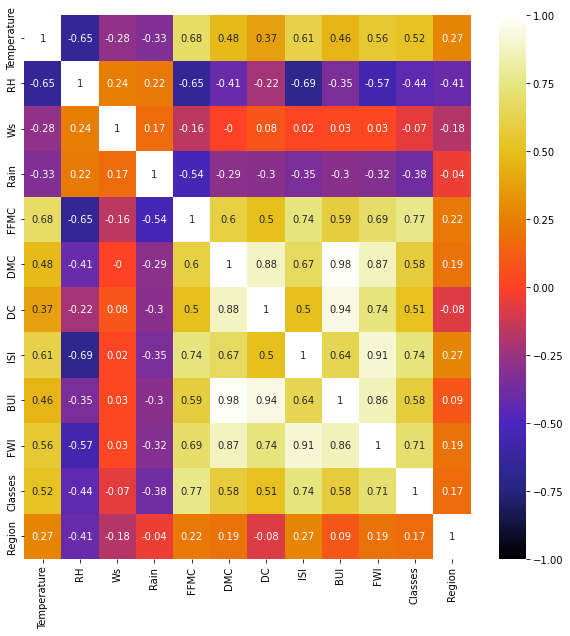

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cmap="CMRmap", annot = True, vmin=-1, vmax=1)
plt.show()

Text(0, 0.5, 'Temperature in Celsius degrees')

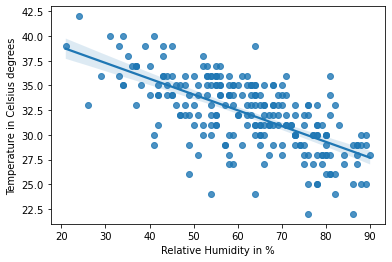

In [9]:
sns.regplot(x='RH', y='Temperature', data= df)
plt.xlabel("Relative Humidity in %")
plt.ylabel("Temperature in Celsius degrees")

Text(0, 0.5, 'Temperature in Celsius degrees')

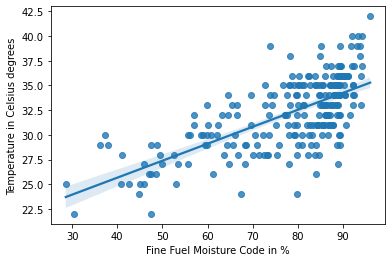

In [10]:
sns.regplot(x='FFMC', y='Temperature', data= df)
plt.xlabel("Fine Fuel Moisture Code in %")
plt.ylabel("Temperature in Celsius degrees")

**Creating X and y for our model**

In [11]:
X = df.drop('Temperature', axis = 1)
X

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
242,27,9,2012,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
243,28,9,2012,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
244,29,9,2012,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0


In [12]:
y = df['Temperature']
y

0      29
1      29
2      26
3      25
4      27
       ..
241    30
242    28
243    27
244    24
245    24
Name: Temperature, Length: 244, dtype: int64

**Splitting into test and train data**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=32)

In [15]:
X_train

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
22,23,6,2012,62,18,0.1,81.4,8.2,47.7,3.3,11.5,3.8,1,0.0
91,31,8,2012,80,21,16.8,52.5,8.7,8.7,0.6,8.3,0.3,0,0.0
216,1,9,2012,86,16,0.0,37.9,0.9,8.2,0.1,1.4,0.0,0,1.0
190,6,8,2012,54,14,3.1,70.5,11.0,9.1,1.3,10.5,0.8,0,1.0
117,26,9,2012,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,3,6,2012,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0,1.0
54,25,7,2012,65,18,0.0,84.3,12.5,88.7,4.8,18.5,7.3,1,0.0
135,12,6,2012,58,17,0.0,88.9,21.3,37.8,8.7,21.2,12.9,1,1.0
43,14,7,2012,61,13,0.6,73.9,7.8,22.9,1.4,8.4,0.8,0,0.0


In [16]:
y_train

22     32
91     28
216    29
190    30
117    31
       ..
126    29
54     31
135    27
43     34
217    28
Name: Temperature, Length: 170, dtype: int64

In [17]:
X_test

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
33,4,7,2012,78,17,0.0,80.1,4.6,18.5,2.7,5.7,1.7,0,0.0
114,23,9,2012,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7,0,0.0
208,24,8,2012,38,15,0.0,92.1,51.3,147.7,12.2,54.9,26.9,1,1.0
151,28,6,2012,37,13,0.0,92.5,27.2,52.4,11.7,27.1,18.4,1,1.0
20,21,6,2012,78,14,0.0,81.0,6.3,31.6,2.6,8.4,2.2,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,11,8,2012,31,15,0.0,94.2,22.5,46.3,16.6,22.4,21.6,1,1.0
240,25,9,2012,70,15,0.0,79.9,13.8,36.1,2.4,14.1,3.0,0,1.0
203,19,8,2012,66,15,0.1,82.7,32.7,96.8,3.3,35.5,7.7,1,1.0
96,5,9,2012,75,16,0.0,80.8,3.4,24.0,2.8,5.1,1.7,1,0.0


In [18]:
y_test

33     33
114    32
208    35
151    37
20     30
       ..
195    40
240    28
203    35
96     29
121    25
Name: Temperature, Length: 74, dtype: int64

In [19]:
## Standardize the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

### Model Training (Linear Regression)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regression = LinearRegression()

In [24]:
regression.fit(X_train, y_train)

LinearRegression()

In [25]:
## Getting the coefficients and the intercepts

print("coefficients : ", regression.coef_)
print("intercept", regression.intercept_)

coefficients :  [-3.47257877e-01 -3.41385979e-01  5.55111512e-16 -8.71581631e-01
 -7.22030282e-01  1.62700586e-01  1.16114329e+00  8.27330925e-01
  1.09256130e+00  1.59619703e+00 -4.86817367e-01 -1.55463439e+00
 -1.55077971e-01  1.17241283e-01]
intercept 32.22941176470588


In [26]:
## Prediction for test data

reg_pred = regression.predict(X_test)

In [27]:
reg_pred

array([30.90450714, 32.02141335, 36.64505324, 36.45720973, 31.26611991,
       32.00171804, 34.37877862, 30.97267393, 32.28530532, 31.57416817,
       35.85120649, 33.49470419, 30.77051042, 28.72792443, 27.87174879,
       33.16991751, 28.56757783, 32.09932278, 28.35223021, 31.07511332,
       29.27771993, 31.15064495, 34.01039799, 37.38633755, 27.49515216,
       33.05459325, 34.06206703, 31.3656218 , 31.86753013, 35.23363489,
       29.1355638 , 35.39511049, 39.15634966, 32.24157324, 38.16064297,
       32.34565584, 33.15729112, 30.32605822, 27.08765651, 36.8445667 ,
       32.89536637, 37.09135154, 31.95216845, 33.8154326 , 35.17882821,
       32.00021843, 34.50164324, 33.0072469 , 25.84561587, 28.33708087,
       29.07281609, 28.73326691, 34.36488179, 31.62036897, 28.37258999,
       34.63030125, 30.98648118, 31.39161687, 33.72852474, 26.41930014,
       34.7201417 , 27.36512134, 24.46792097, 32.84659275, 35.88546334,
       30.66382576, 33.51573672, 35.08398907, 34.81142179, 37.48

**Checking assumptions of Linear Regression**

1. Test and predicted alues should have linear relation
2. Residual should show normal distribution
3. Scatter plot of prediction and residual should be an uniform distribution

Text(0, 0.5, 'Predicted Data')

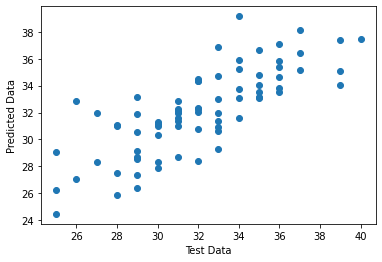

In [28]:
# 1. Test and predicted alues should have linear relation

plt.scatter(y_test, reg_pred)
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")

#  linear

In [29]:
## residuals
residuals = y_test-reg_pred
residuals

33     2.095493
114   -0.021413
208   -1.645053
151    0.542790
20    -1.266120
         ...   
195    2.517975
240   -3.030240
203    1.926969
96    -1.518877
121   -1.213300
Name: Temperature, Length: 74, dtype: float64

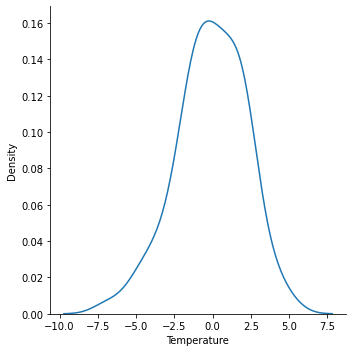

In [30]:
# 2. Residual should show normal distribution

sns.displot(residuals, kind='kde')

# normally distributed

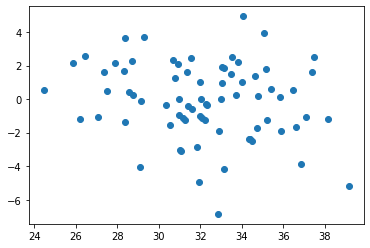

In [31]:
# 3. Scatter plot of prediction and residual should be an uniform distribution

plt.scatter(reg_pred, residuals)

# homoscedasticity

**Performance Metrics**

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
print("MAE : ", mean_absolute_error(y_test, reg_pred))
print("MSE : ", mean_squared_error(y_test,reg_pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, reg_pred)))

MAE :  1.7836761881295167
MSE :  5.071068079117988
RMSE :  2.2519032126443594


**Model evaluation**

In [34]:
from sklearn.metrics import r2_score

In [35]:
## R square

score = r2_score(y_test, reg_pred)
print("R squarred : ", score)

R squarred :  0.5852933976307089


In [36]:
## Adjusted R square

adj = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R square : ", adj)

Adjusted R square :  0.4868884411363008


**We can see that response variable can somewhat be explained by the predictor variable**

### Handling outliers and checking

In [37]:
q = df['Ws'].quantile(0.99)
# we are removing the top 1% data from the Ws column
df_cleaned = df[df['Ws']<q]

q = df_cleaned['Ws'].quantile(0.01)
# we are removing the bottom 1% data from the Ws column
df_cleaned = df_cleaned[df_cleaned['Ws']>q]

q = df_cleaned['Rain'].quantile(0.97)
# we are removing the top 3% data from the Rain column
df_cleaned = df_cleaned[df_cleaned['Rain']<q]

q = df_cleaned['FFMC'].quantile(0.02)
# we are removing the bottom 2% data from the FFMC column
df_cleaned = df_cleaned[df_cleaned['FFMC']>q]

q = df_cleaned['DMC'].quantile(0.91)
# we are removing the top 9% data from the DMC column
df_cleaned = df_cleaned[df_cleaned['DMC']<q]

q = df_cleaned['DC'].quantile(0.91)
# we are removing the top 9% data from the DC column
df_cleaned = df_cleaned[df_cleaned['DC']<q]

q = df_cleaned['ISI'].quantile(0.99)
# we are removing the top 1% data from the ISI column
df_cleaned = df_cleaned[df_cleaned['ISI']<q]

q = df_cleaned['BUI'].quantile(0.98)
# we are removing the top 2% data from the BUI column
df_cleaned = df_cleaned[df_cleaned['BUI']<q]

q = df_cleaned['FWI'].quantile(0.99)
# we are removing the top 1% data from the FWI column
df_cleaned = df_cleaned[df_cleaned['FWI']<q]

In [38]:
df_cleaned

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0.0
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,25,9,2012,28,70,15,0.0,79.9,13.8,36.1,2.4,14.1,3.0,0,1.0
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0


coefficients :  [-5.35157719e-01 -4.27892460e-01 -8.43769499e-15 -1.24830257e+00
 -5.40045008e-01  2.90578965e-01  1.00774546e+00  2.94141851e+00
  1.01074180e+00  2.85016530e-01 -2.59735289e+00 -9.34601188e-01
  1.49592565e-01 -2.18801284e-01]
intercept 32.0


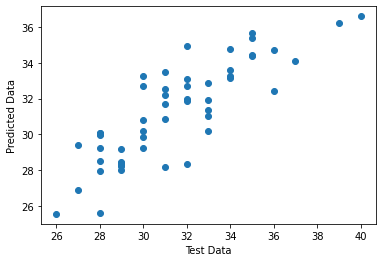

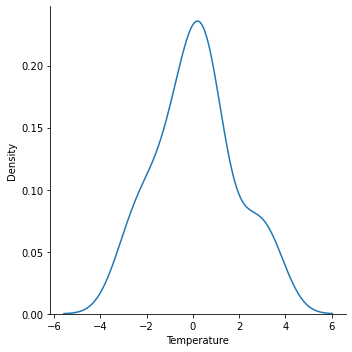

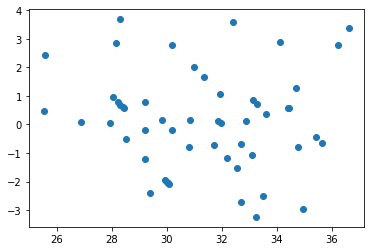

MAE1 :  1.3411275613834233
MSE1 :  2.9396464940087266
RMSE1 :  1.7145397324088838
R squarred_1 :  0.6926196023797455
Adjusted R square_1 :  0.5793741927301781


In [39]:
X1 = df_cleaned.drop(['Temperature'], axis = 1)

y1 = df_cleaned['Temperature']

X1_train, X1_test, y1_train, y1_test =  train_test_split(X1, y1, test_size=0.3, random_state=32)

X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

regression1 = LinearRegression()
regression1.fit(X1_train, y1_train)

print("coefficients : ", regression1.coef_)
print("intercept", regression1.intercept_)

reg_pred1 = regression1.predict(X1_test)

plt.scatter(y1_test, reg_pred1)
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")
plt.show()

residuals1 = y1_test-reg_pred1


sns.displot(residuals1, kind='kde')
plt.show()

plt.scatter(reg_pred1, residuals1)
plt.show()

print("MAE1 : ", mean_absolute_error(y1_test, reg_pred1))
print("MSE1 : ", mean_squared_error(y1_test,reg_pred1))
print("RMSE1 : ", np.sqrt(mean_squared_error(y1_test, reg_pred1)))

score1 = r2_score(y1_test, reg_pred1)
print("R squarred_1 : ", score1)

adj1 = 1-(1-score1)*(len(y1_test)-1)/(len(y1_test)-X1_test.shape[1]-1)
print("Adjusted R square_1 : ", adj1)

**The Adjusted R square improved giving use more explaination of data**